In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\mushe\\Downloads'

In [4]:
os.chdir('C:\\Users\\mushe\\Downloads')

In [5]:
data = pd.read_csv("customers.csv")

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.shape

(200, 5)

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:xlabel='Gender'>

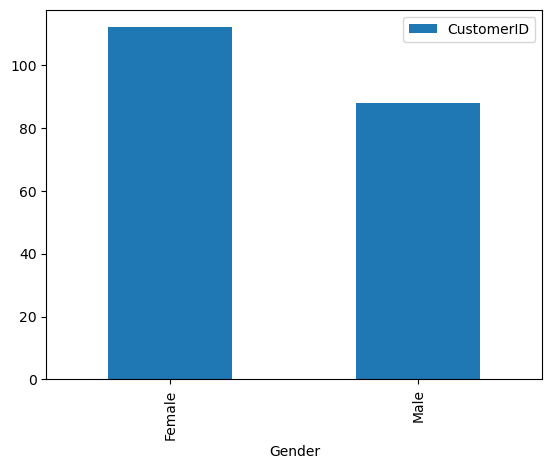

In [12]:
data.groupby('Gender')['CustomerID'].count().reset_index().plot(kind = 'bar', x = 'Gender', y = 'CustomerID')

<AxesSubplot:ylabel='Frequency'>

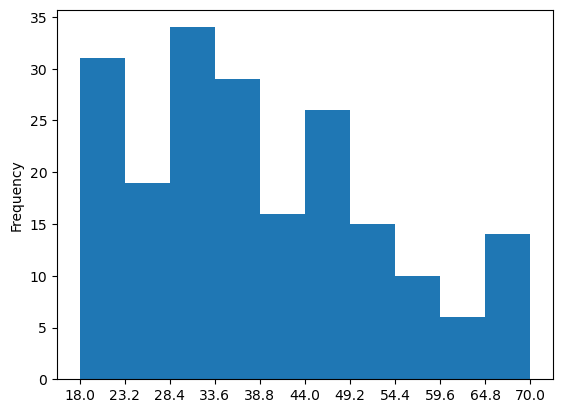

In [13]:
count, bins = np.histogram(data['Age'], bins = 10)
data['Age'].plot(kind = 'hist', xticks = bins)

<AxesSubplot:ylabel='Frequency'>

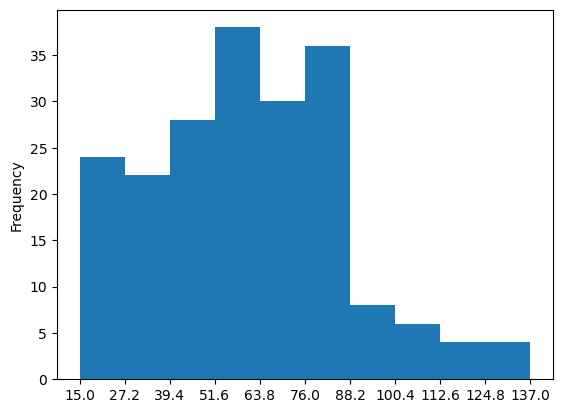

In [14]:
count, bins = np.histogram(data['Annual Income (k$)'], bins = 10)
data['Annual Income (k$)'].plot(kind = 'hist', xticks = bins)

<AxesSubplot:ylabel='Frequency'>

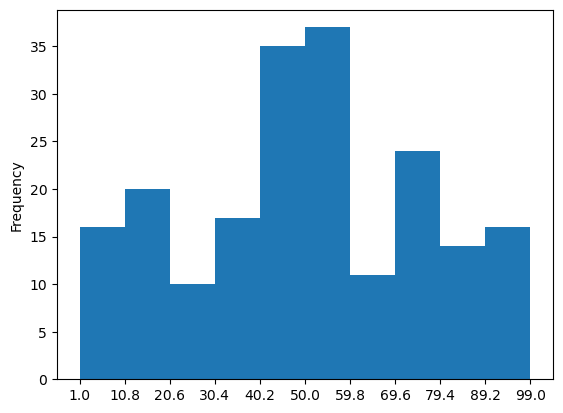

In [15]:
count, bins = np.histogram(data['Spending Score (1-100)'], bins = 10)
data['Spending Score (1-100)'].plot(kind = 'hist', xticks = bins)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

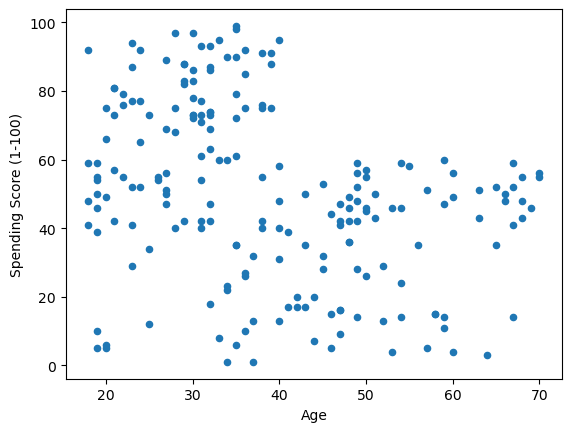

In [16]:
data.plot(kind = 'scatter', x = 'Age', y = 'Spending Score (1-100)')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

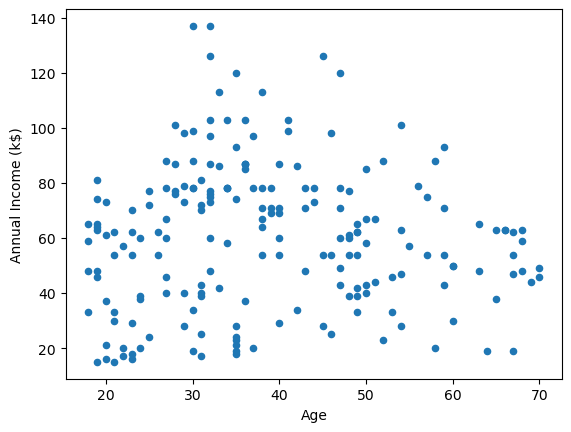

In [17]:
data.plot(kind = 'scatter', x = 'Age', y = 'Annual Income (k$)')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

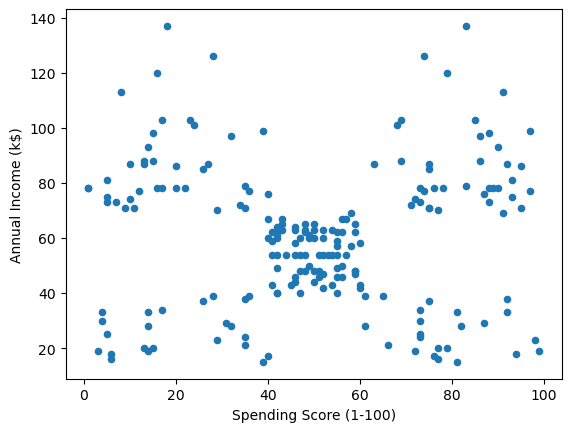

In [18]:
data.plot(kind = 'scatter', x = 'Spending Score (1-100)', y = 'Annual Income (k$)')

In [19]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [21]:
data.rename(columns = {'Spending Score (1-100)' : 'Spending Score'}, inplace = True)
data.rename(columns = {'Annual Income (k$)' : 'Annual Income'}, inplace = True)

In [22]:
gender = pd.get_dummies(data['Gender'])
data = pd.concat([data, gender], axis = 1)
data.drop(columns = ['Gender'], inplace = True)

In [23]:
def find_closest_centroid(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    index = np.zeros(X.shape[0])
    
    for i in range(m):
        # Create a list to store distance between i th row of X and j th row of centroids
        distance = []
        for j in range(K):
            # Calculate distance between i th row of X and j th row of centroids
            distance.append(np.linalg.norm(X[i] - centroids[j]))
        # Find smallest distance from i th row of X to j th row of centroids
        index[i] = np.argmin(distance)
    return index

In [24]:
data

,CustomerID,Age,Annual Income,Spending Score,Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [25]:
centroids = np.array([[15, 39], [15, 81], [50, 55], [80, 20], [100, 100]])
X = np.array(data[['Annual Income', 'Spending Score']])
index = find_closest_centroid(X, centroids)
index

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 2., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 2., 1., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 4., 3., 2., 3., 4., 3., 2., 3., 2., 3., 2., 3., 4.,
       3., 2., 3., 2., 3., 4., 3., 4., 3., 4., 3., 2., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 2., 3., 4., 3., 4., 3., 4., 3., 4., 3., 2.,
       3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.])

In [26]:
def compute_new_centroid(X, index, K):
    n = X.shape[1]
    new_centroid = np.zeros((K, n))
    
    for i in range(K):
        # Grouping j th row of X, which have the same index
        points = X[index == i]
        new_centroid[i] = np.mean(points, axis = 0)
    return new_centroid

In [27]:
centroids = compute_new_centroid(X, index, 5)
centroids

array([[25.14285714, 19.52380952],
       [24.95      , 81.        ],
       [55.79120879, 52.21978022],
       [87.        , 18.63157895],
       [90.06666667, 85.        ]])

Text(90.06666667, 85, 'High Income, High Score')

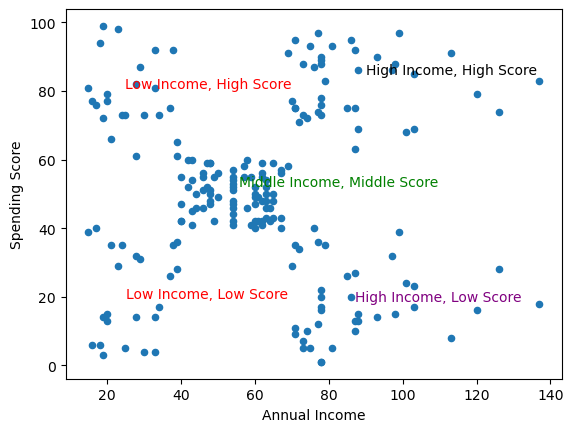

In [28]:
data.plot(kind = 'scatter', x = 'Annual Income', y = 'Spending Score')
plt.text(25.14285714, 19.52380952, 'Low Income, Low Score', color = 'r')
plt.text(24.95, 81, 'Low Income, High Score', color = 'r')
plt.text(55.79120879, 52.21978022, 'Middle Income, Middle Score', color = 'green')
plt.text(87, 18.63157895, 'High Income, Low Score', color = 'purple')
plt.text(90.06666667, 85, 'High Income, High Score', color = 'black')

In [29]:
new_index = find_closest_centroid(X, centroids)
new_index

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 2., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.])

In [30]:
new_centroids = compute_new_centroid(X, new_index, 5)
new_centroids

array([[26.30434783, 20.91304348],
       [25.0952381 , 80.04761905],
       [54.6875    , 50.0875    ],
       [87.2972973 , 18.05405405],
       [86.53846154, 82.12820513]])

Text(86.53846154, 82.12820513, 'High Income, High Score')

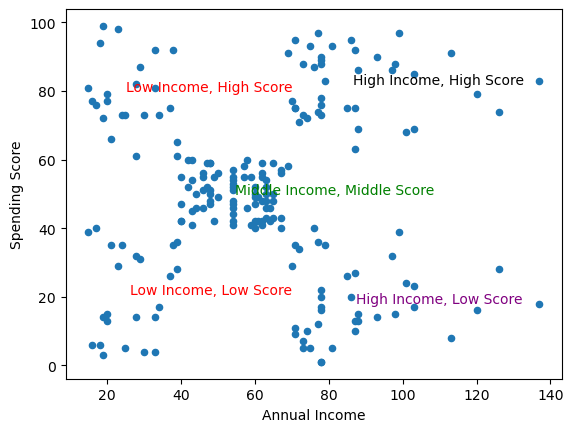

In [31]:
data.plot(kind = 'scatter', x = 'Annual Income', y = 'Spending Score')
plt.text(26.30434783, 20.91304348, 'Low Income, Low Score', color = 'r')
plt.text(25.0952381, 80.04761905, 'Low Income, High Score', color = 'r')
plt.text(54.6875, 50.0875, 'Middle Income, Middle Score', color = 'green')
plt.text(87.2972973, 18.05405405, 'High Income, Low Score', color = 'purple')
plt.text(86.53846154, 82.12820513, 'High Income, High Score', color = 'black')

In [32]:
new_index = find_closest_centroid(X, new_centroids)
new_index

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 2., 0., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 4., 3., 4., 2., 4., 3., 4., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 2., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.])

In [33]:
new_centroids = compute_new_centroid(X, new_index, 5)
new_centroids

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513]])

Text(86.53846154, 82.12820513, 'High Income, High Score')

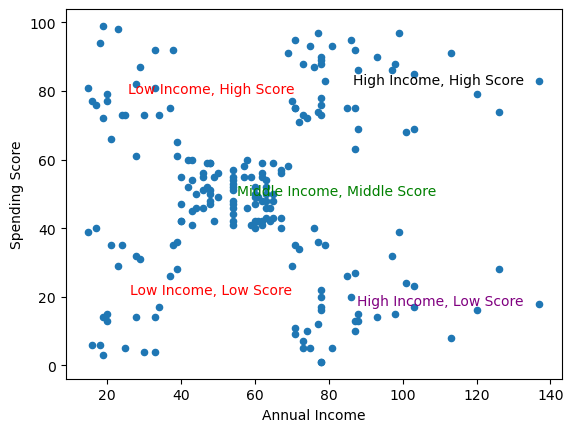

In [34]:
data.plot(kind = 'scatter', x = 'Annual Income', y = 'Spending Score')
plt.text(26.30434783, 20.91304348, 'Low Income, Low Score', color = 'r')
plt.text(25.72727273, 79.36363636, 'Low Income, High Score', color = 'r')
plt.text(55.0875, 49.7125, 'Middle Income, Middle Score', color = 'green')
plt.text(87.75, 17.58333333, 'High Income, Low Score', color = 'purple')
plt.text(86.53846154, 82.12820513, 'High Income, High Score', color = 'black')

In [35]:
new_index = find_closest_centroid(X, new_centroids)
new_index

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 2., 0., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 4., 3., 4., 2., 4., 3., 4., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 2., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.])

In [36]:
new_centroids = compute_new_centroid(X, new_index, 5)
new_centroids

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513]])

In [37]:
cluster = pd.DataFrame(index.reshape(data.shape[0], 1), columns = ['Cluster'])
data = pd.concat([data, cluster], axis = 1)
data.head()

,CustomerID,Age,Annual Income,Spending Score,Female,Male,Cluster
0,1,19,15,39,0,1,0.0
1,2,21,15,81,0,1,1.0
2,3,20,16,6,1,0,0.0
3,4,23,16,77,1,0,1.0
4,5,31,17,40,1,0,0.0


In [38]:
for i in data['Cluster']:
    if i == 0:
        data['Cluster'].replace(0, 'Low Income, Low Score', inplace = True)
    elif i == 1:
        data['Cluster'].replace(1, 'Low Income, High Score', inplace = True)
    elif i == 2:
        data['Cluster'].replace(2, 'Middle Income, Middle Score', inplace = True)
    elif i == 3:
        data['Cluster'].replace(3, 'High Income, Low Score', inplace = True)
    elif i == 4:
        data['Cluster'].replace(4, 'High Income, High Score', inplace = True)

In [39]:
data.head()

,CustomerID,Age,Annual Income,Spending Score,Female,Male,Cluster
0,1,19,15,39,0,1,"Low Income, Low Score"
1,2,21,15,81,0,1,"Low Income, High Score"
2,3,20,16,6,1,0,"Low Income, Low Score"
3,4,23,16,77,1,0,"Low Income, High Score"
4,5,31,17,40,1,0,"Low Income, Low Score"
